In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Project Group: Nidhish Nerur, Erin Kim, Yue Taira, Michael Crosson, Megha Sengupta

# Exploratory Data Analysis

Goal: The dataset contains employee and hospital data to predict attrition of nurses in the U.S. healthcare system. Nurse attrition has risen dramatically with the on-set of COVID-19 and the U.S. is expected to have a shortage of nurses in coming years. We will determine the features with the greatest predictive power in hopes of helping healthcare facilities retain nurses, thereby minimizing re-hiring costs while improving brand reputation. 

In [6]:
#Read in dataset
df = pd.read_csv("healthcare_attrition.csv")

In [7]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
#Column descriptions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [9]:
#Check for missing values
df.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#Check balance in binary outcome variable. There are far more employees who did not leave the company than those who did.
#We will balance the outcome variable 
df['Attrition'].value_counts()

Attrition
No     1477
Yes     199
Name: count, dtype: int64

In [11]:
#Summary statistics
df.describe()[['MonthlyIncome', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'DistanceFromHome', 'Age', 'TotalWorkingYears']]

,MonthlyIncome,YearsSinceLastPromotion,NumCompaniesWorked,DistanceFromHome,Age,TotalWorkingYears
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,6516.512530,2.200477,2.662291,9.221957,36.866348,11.338902
std,4728.456618,3.229587,2.477704,8.158118,9.129126,7.834996
min,1009.000000,0.000000,0.000000,1.000000,18.000000,0.000000
25%,2928.250000,0.000000,1.000000,2.000000,30.000000,6.000000
50%,4899.000000,1.000000,2.000000,7.000000,36.000000,10.000000
75%,8380.250000,3.000000,4.000000,14.000000,43.000000,15.000000
max,19999.000000,15.000000,9.000000,29.000000,60.000000,40.000000


In [12]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
#Separate variables for graphing purposes
df_num = df[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
          'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
          'YearsSinceLastPromotion', 'YearsWithCurrManager']]
df_cat = df[['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField',
            'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
            'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']]



<Axes: >

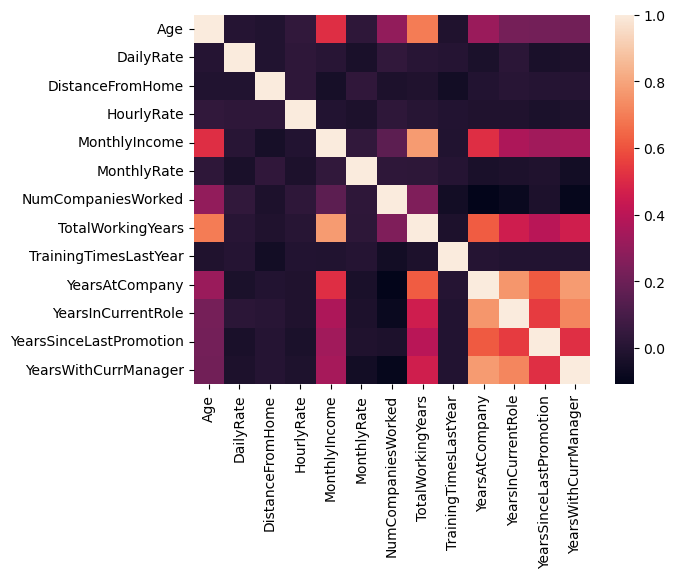

In [14]:
#Correlation heatmap for numeric columns
sns.heatmap(df_num.corr())

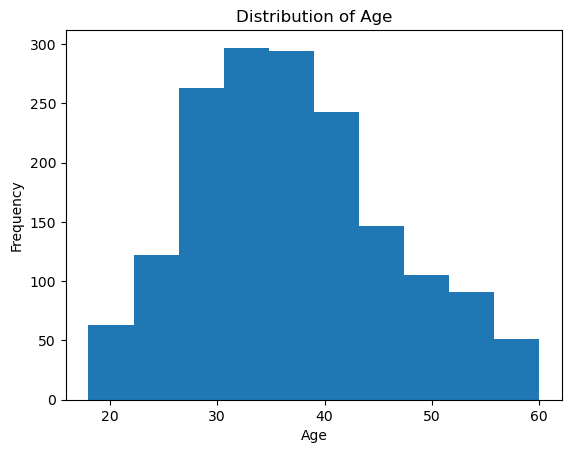

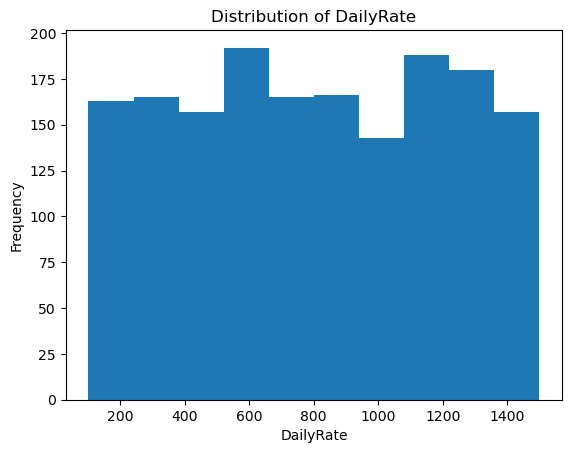

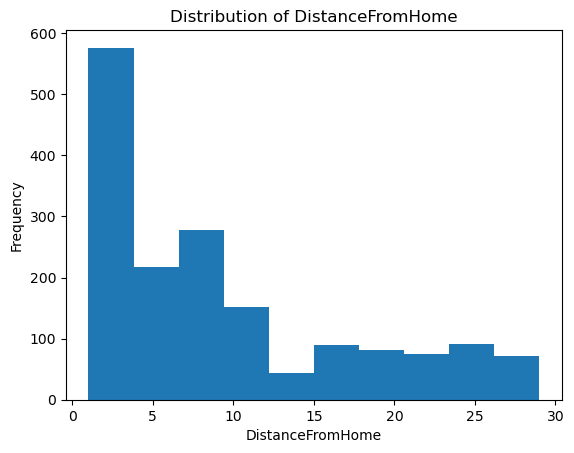

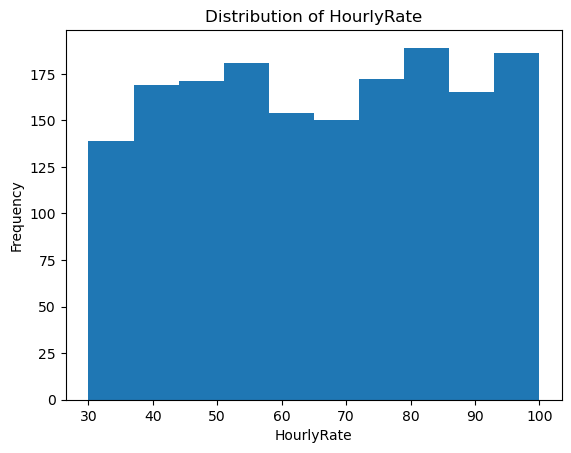

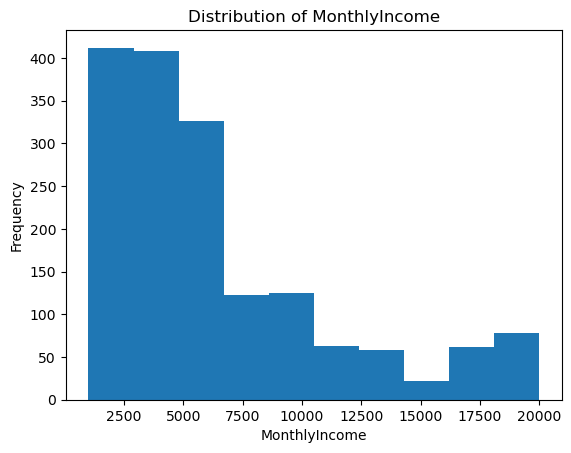

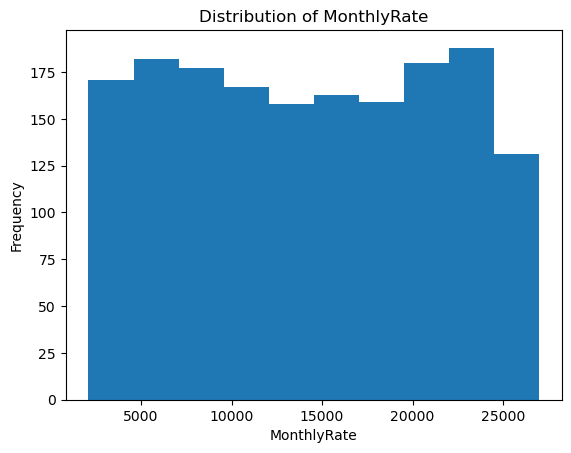

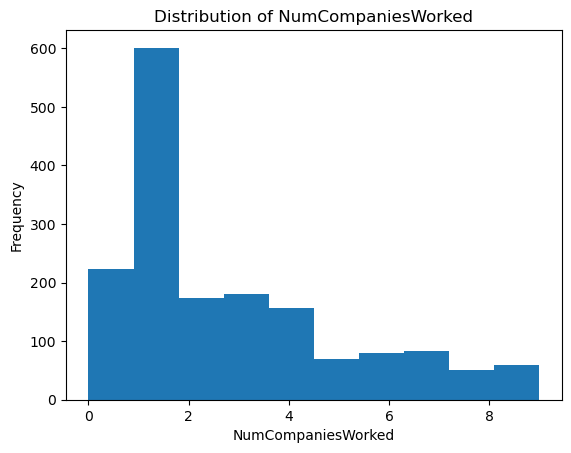

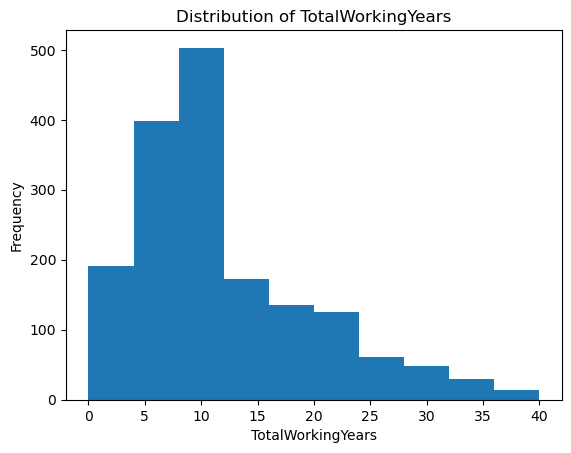

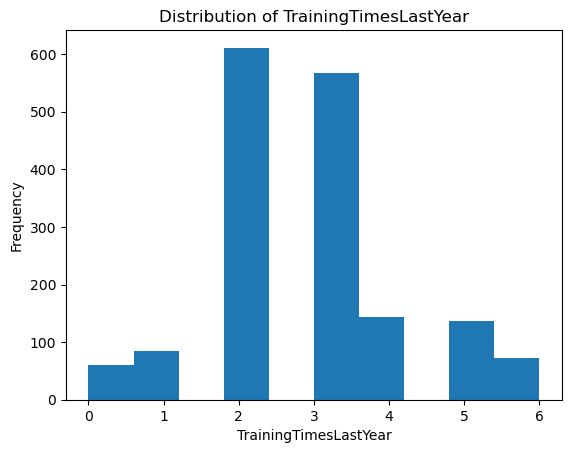

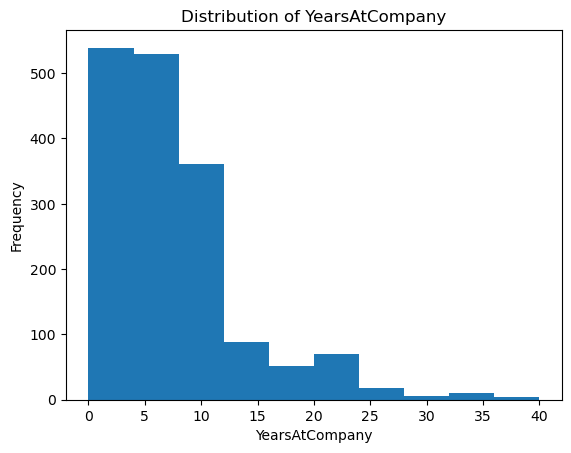

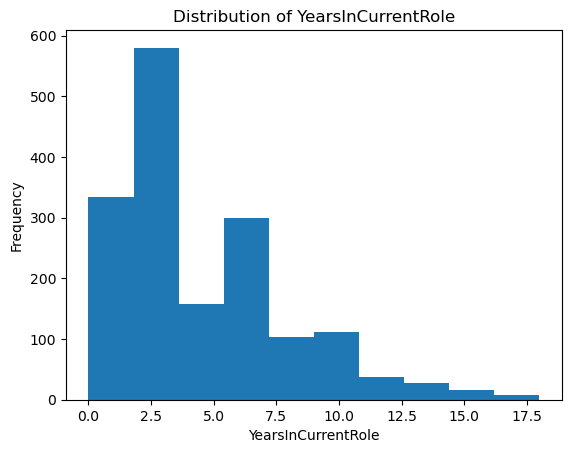

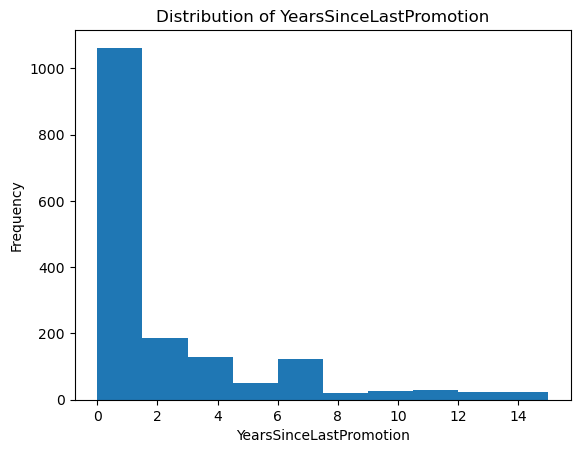

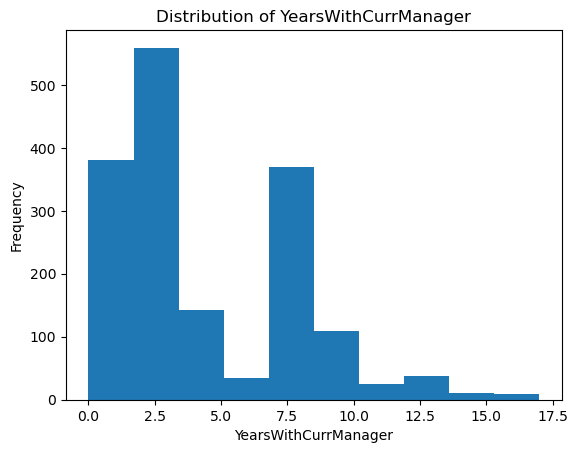

In [15]:
#Plots for numeric variables
for col in df_num.columns.values:
    plt.hist(df_num[col])
    plt.ylabel("Frequency")
    plt.xlabel(col)
    plt.title("Distribution of " + col)
    plt.show()

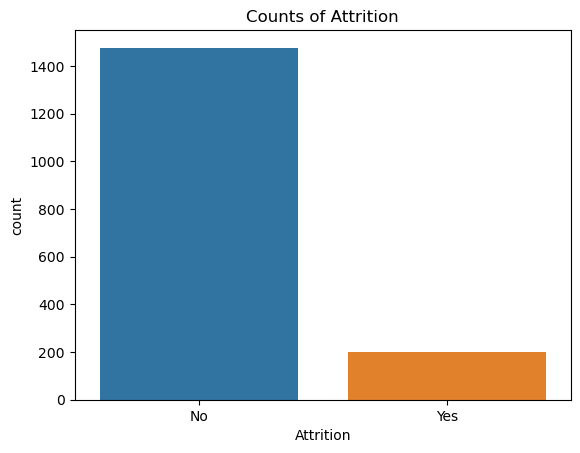

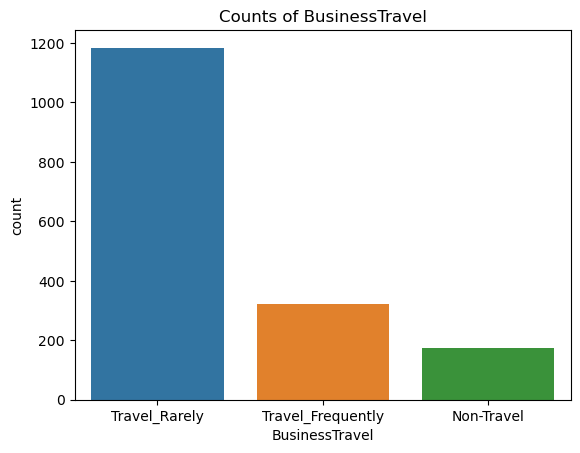

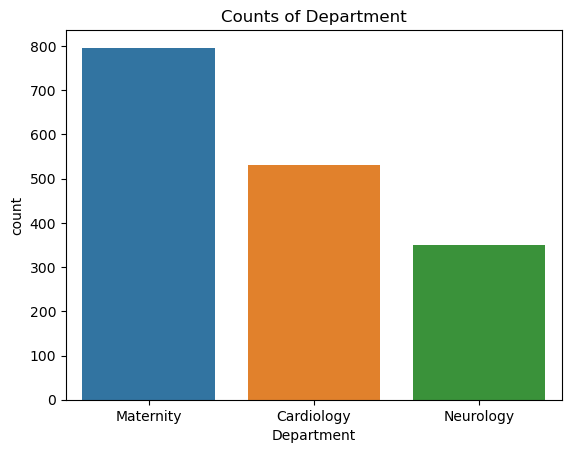

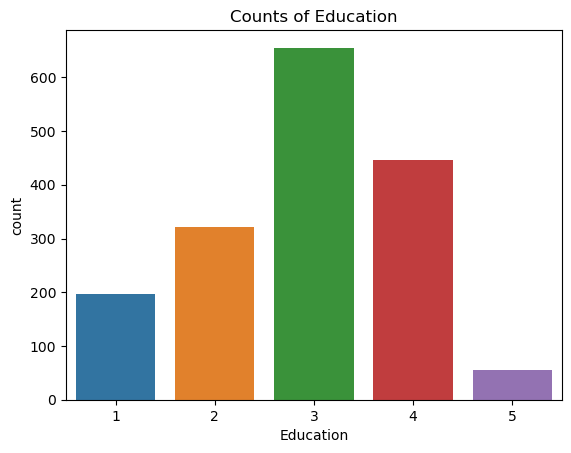

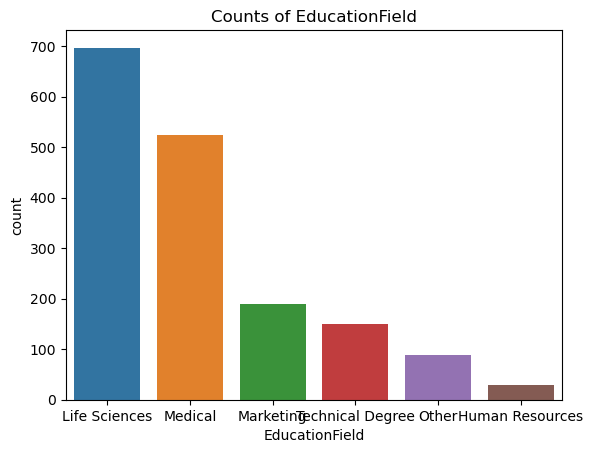

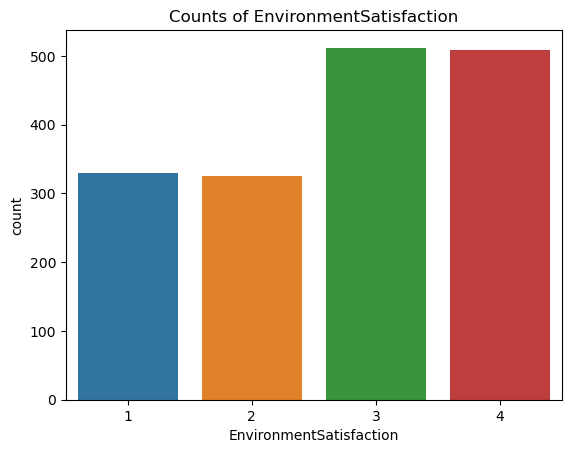

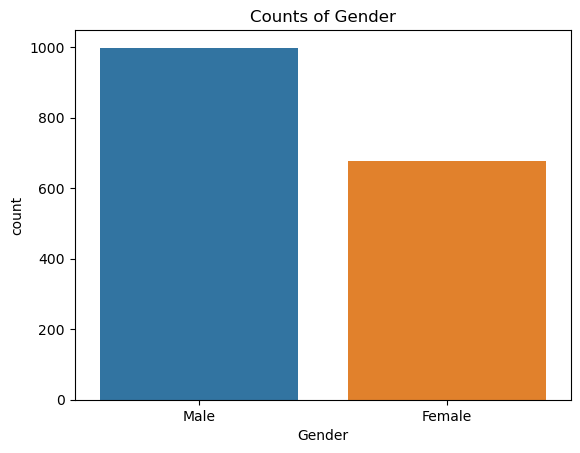

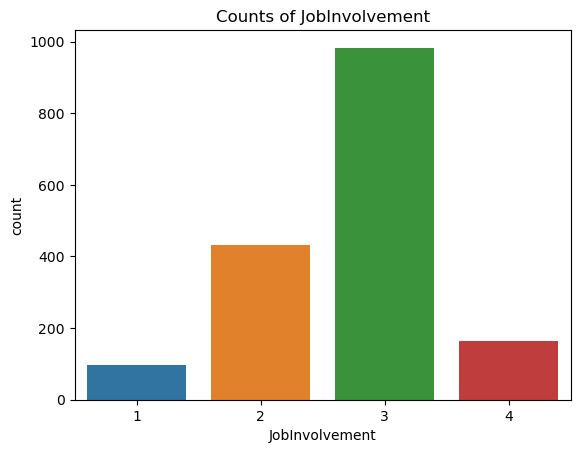

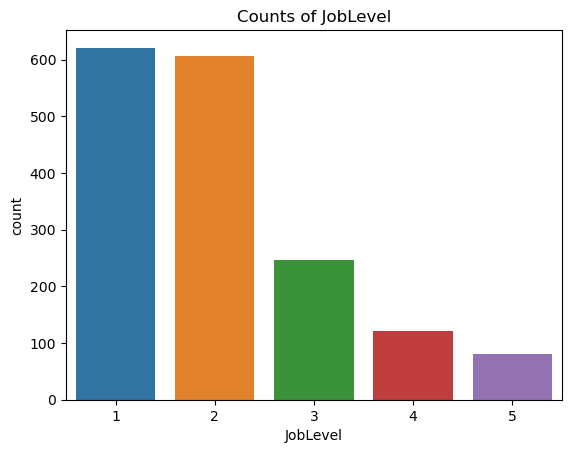

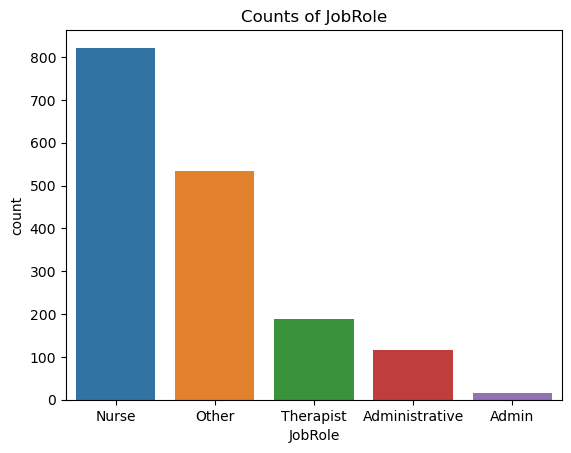

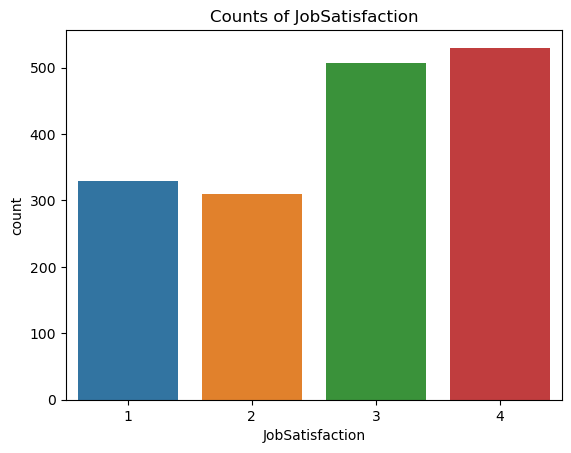

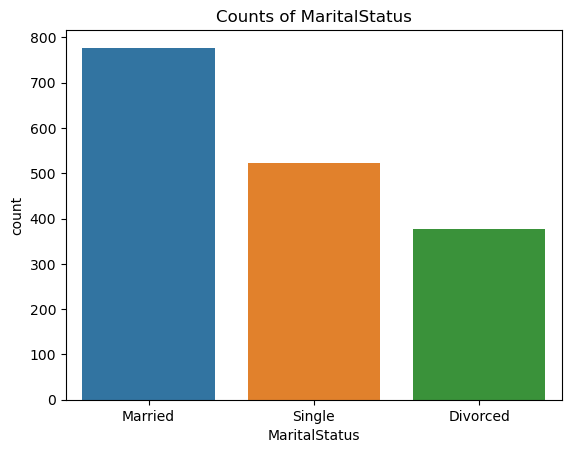

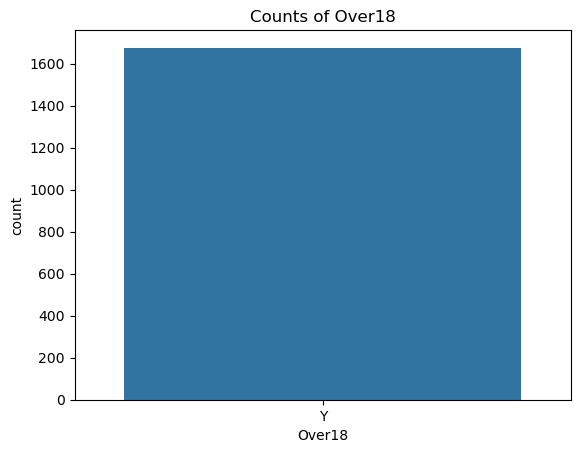

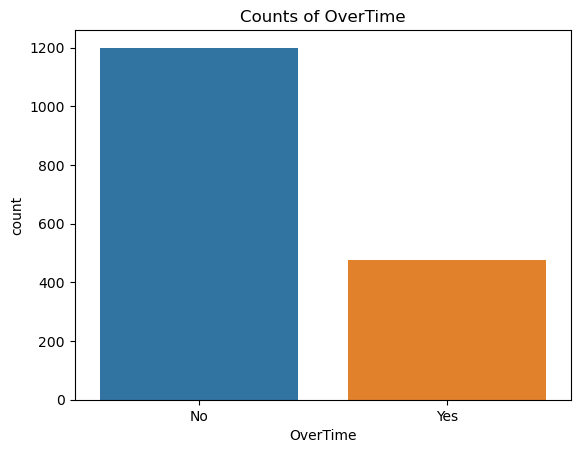

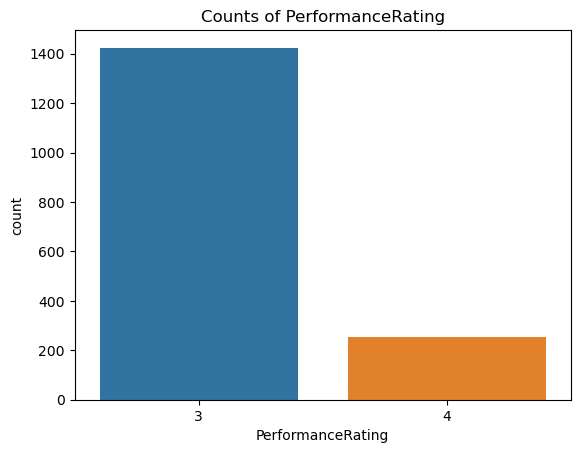

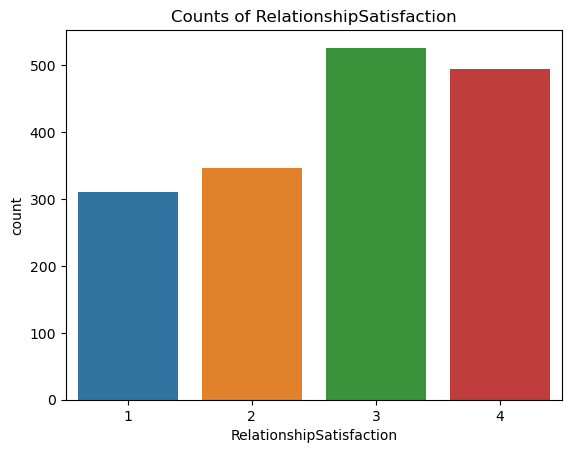

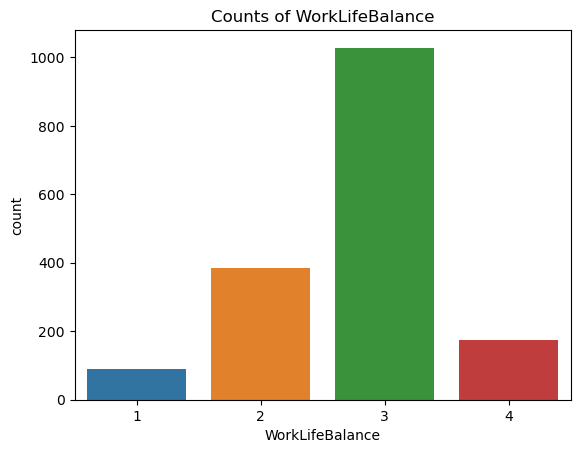

In [16]:
#Plots for categorical features
for col in df_cat.columns.values:
    sns.barplot(x = df_cat[col].value_counts().index, y = df_cat[col].value_counts()).set_title("Counts of " + col)
    plt.show()
     

# One-hot encoding for categorical features

In [17]:
#One-hot encoding for categorical variables
df = pd.get_dummies(df, columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                                  'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], 
                    dtype = 'int64',
                    drop_first = True)

In [18]:
#Applied one-hot encoding to the dataset
df.head()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1313919,41,1102,1,2,1,2,94,3,2,...,0,0,0,0,1,0,0,0,1,1
1,1200302,49,279,8,1,1,3,61,2,2,...,0,0,1,0,0,1,0,1,0,0
2,1060315,37,1373,2,2,1,4,92,2,1,...,1,0,1,0,1,0,0,0,1,1
3,1272912,33,1392,3,4,1,4,56,3,1,...,0,0,0,0,0,1,0,1,0,1
4,1414939,27,591,2,1,1,1,40,3,1,...,0,0,1,0,1,0,0,1,0,0


In [19]:
#Dropping certain columns that do not add predictive power
#EmployeeID is unique for each worker
#EmployeeCount is 1 for all employees
#Over18 is always True
#StandardHours is 80 for everyone
df.drop(columns = ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours'], inplace = True)

In [20]:
#Cleaned dataset
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,1,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,1,0,1,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,0,1,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,1,0,1,0,0,1,0,0


# Train/Test split and Standardization

In [21]:
#Split data into training and testing sets
X = df.drop(columns = ['Attrition_Yes'], axis = 1)
y = df['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [22]:
#Handle Class Imbalance for Attrition
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=1)
# X_train_adj, y_train_adj = sm.fit_resample(X_train, y_train)

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_adj, y_train_adj = ros.fit_resample(X_train, y_train)

In [24]:
#Classes are balanced with 0 as no attrition, and 1 means the employee left the company
y_train_adj.value_counts()

Attrition_Yes
0    1034
1    1034
Name: count, dtype: int64

In [25]:
#The test set classes remain unseen
y_test.value_counts()

Attrition_Yes
0    443
1     60
Name: count, dtype: int64

In [26]:
#Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_adj)
X_test_scaled = scaler.transform(X_test)

# Model Development

In [27]:
#List containing each model
model_list = []

In [ ]:
#K Nearest Neighbors determine optimal number of neighbors
accuracy_scores = []
for i in range(1, 10):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train_scaled, y_train_adj)
    predicted_val = knn_model.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, predicted_val))

import matplotlib.pyplot as plt
plt.plot(range(1, 10), accuracy_scores, color = 'blue', linestyle = '-', marker = 'o')
plt.title("Accuracy scores with various number of neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Scores")
plt.show()

print("Highest Accuracy Score: " + str(max(accuracy_scores)) + " with " + str(accuracy_scores.index(max(accuracy_scores))) + " number of neighbors")


In [28]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 9)
knn_model.fit(X_train_scaled, y_train_adj)

KNeighborsClassifier(n_neighbors=9)

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train_adj)

LogisticRegression()

In [30]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train_adj)

DecisionTreeClassifier()

In [31]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train_adj)

RandomForestClassifier()

In [32]:
#Gradient Boost Classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective = "binary:logistic", learning_rate = 0.3, n_estimators = 100,
                              max_depth = 6, random_state = 42)
xgb_model.fit(X_train_scaled, y_train_adj)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

## Grid-Search to fine-tune parameters

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
search_param = {'max_depth': [3, 6, 10],
                'learning_rate': [.01, .05, .1, .3],
                'n_estimators': [100, 500, 1000]}
GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_param,
                 scoring = ['roc_auc', 'accuracy'],
                 refit = 'roc_auc', 
                 cv = 5,
                 verbose = 4)
GS.fit(X_train_scaled, y_train_adj)

In [ ]:
print(GS.best_estimator_, '\n', GS.best_score_)

In [ ]:
print(xgb_model.feature_importances_)

In [ ]:
X_train.columns

Text(0.5, 0, 'XGBoost Feature Importances')

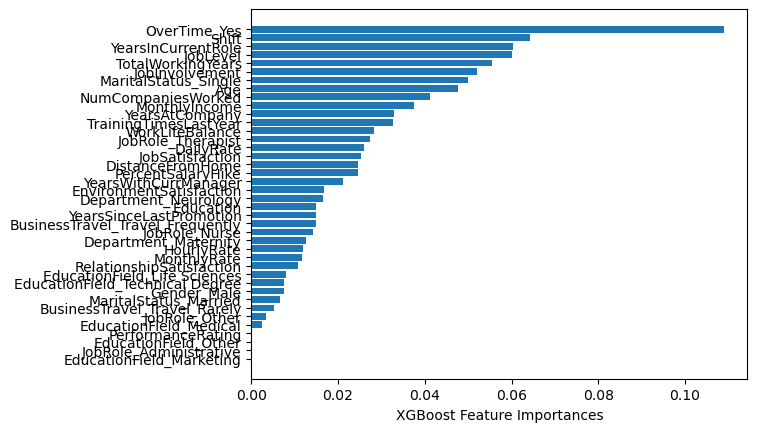

In [33]:
#Feature importance plot from XGBoost
from xgboost import plot_importance
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importances")

Text(0.5, 0, 'Logistic Regression Permutation Importance Features')

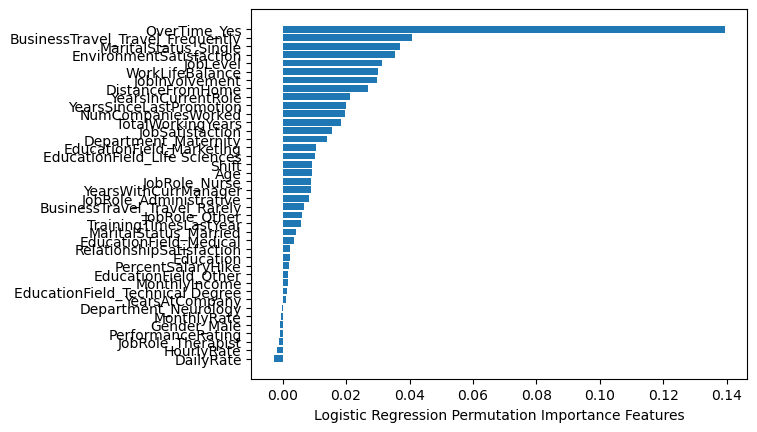

In [34]:
#Feature importance for Logistic Regression
from sklearn.inspection import permutation_importance
result = permutation_importance(lr_model, X_train_scaled, y_train_adj, n_repeats=10,
                                random_state=0)
result.importances_mean
sorted_idx = result.importances_mean.argsort()[:]
plt.barh(X_train.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Logistic Regression Permutation Importance Features")

In [35]:
model_list = [knn_model, lr_model, dt_model, rf_model, xgb_model]

# Model Performance

In [36]:
def metric_calc(model_list, X_test_scaled, y_test):
    for elem in model_list:
        print(str(elem))
        model_predictions = elem.predict(X_test_scaled)
        print("Training Accuracy: " + str(elem.score(X_train_scaled, y_train_adj)))
        print("Test Accuracy: " + str(accuracy_score(y_test, model_predictions)))
        print("AUC Score: " + str(roc_auc_score(y_test, model_predictions)))
        print(confusion_matrix(y_test, model_predictions))
        print(classification_report(y_test, model_predictions))

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, confusion_matrix 
metric_calc(model_list, X_test_scaled, y_test)

KNeighborsClassifier(n_neighbors=9)
Training Accuracy: 0.9042553191489362
Test Accuracy: 0.7634194831013916
AUC Score: 0.7792325056433409
[[336 107]
 [ 12  48]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       443
           1       0.31      0.80      0.45        60

    accuracy                           0.76       503
   macro avg       0.64      0.78      0.65       503
weighted avg       0.89      0.76      0.80       503

LogisticRegression()
Training Accuracy: 0.8965183752417795
Test Accuracy: 0.8846918489065606
AUC Score: 0.8913092550790067
[[391  52]
 [  6  54]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       443
           1       0.51      0.90      0.65        60

    accuracy                           0.88       503
   macro avg       0.75      0.89      0.79       503
weighted avg       0.93      0.88      0.90       503

DecisionTreeClassifier()
Training Accur